# Explore here

In [1]:
# basics
import os
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

2025-05-10 19:19:33.347795: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-10 19:19:33.378796: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-10 19:19:33.559739: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-10 19:19:33.691169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746904773.816881   24259 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746904773.91

In [2]:
# Utils
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Crear dataframe con etiquetas
# Leer todos los nombres de archivos
train_dir = "../data/raw/train"
file_names = os.listdir(train_dir)

# Crear dataframe con etiquetas a partir del nombre
df = pd.DataFrame({
    "filename": file_names, 
    "class": ["cat" if "cat" in fname else "dog" for fname in file_names]
})

df.sample(5)

,filename,class
5395,dog.7243.jpg,dog
11263,cat.8720.jpg,cat
17785,cat.8247.jpg,cat
14082,dog.4871.jpg,dog
20508,dog.4615.jpg,dog


In [4]:
# Crear ImageDataGenerator desde dataframe separando 20% para validacion
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe = df, 
    directory = train_dir, 
    x_col = "filename", 
    y_col = "class", 
    target_size = (200, 200), 
    batch_size = 16, 
    class_mode = "binary", 
    subset = "training", 
    seed = 42
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='filename',
    y_col='class',
    target_size=(200, 200),
    batch_size=16,
    class_mode='binary',
    subset='validation', 
    seed = 42
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [5]:
# Cargar imagenes de test para predecir
test_dir = "../data/raw/test1"
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({"filename": test_filenames})

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="filename",
    y_col=None,
    target_size=(200, 200),
    batch_size=16,
    class_mode=None,
    shuffle=False
)

Found 12500 validated image filenames.


In [6]:
# Obtener indice que coresponde a cada clase
train_generator.class_indices

{'cat': 0, 'dog': 1}

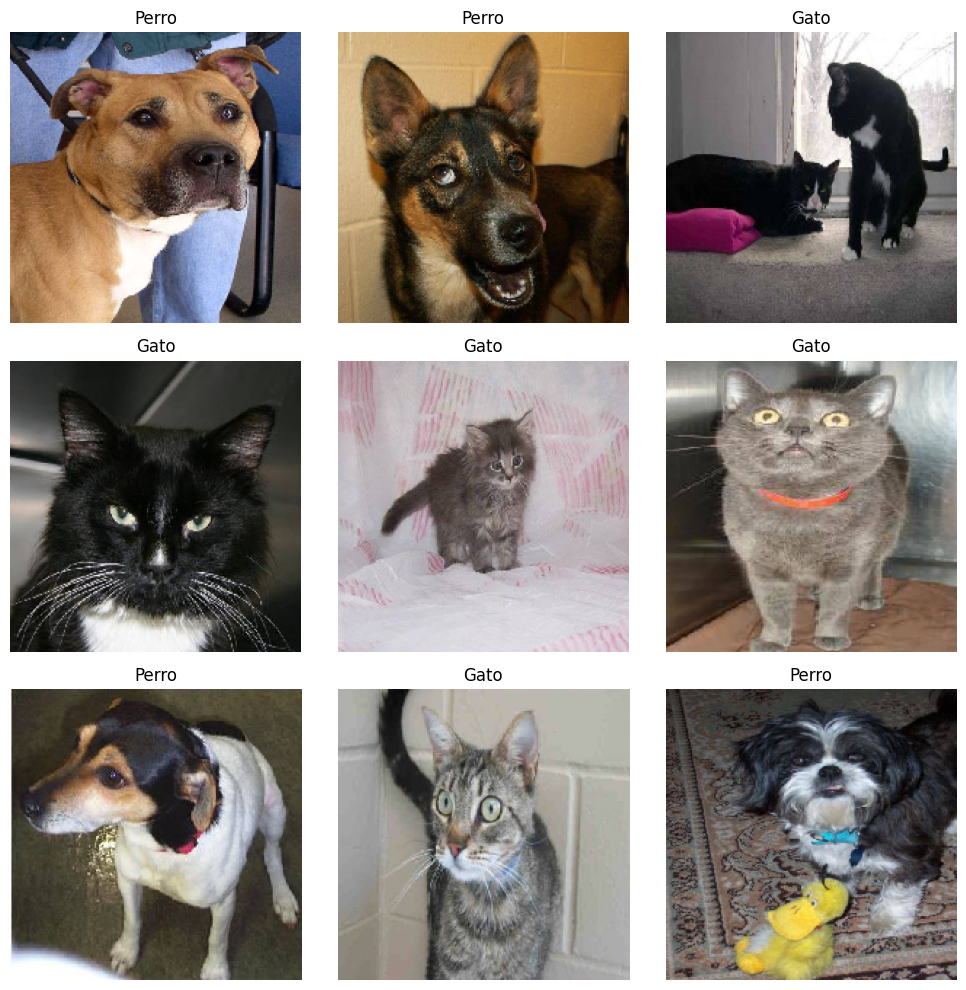

In [7]:
# Obtener un batch del generador
images, labels = next(train_generator)  # primer lote (batch) del generador

# Mostrar 9 imágenes del batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label = 'Perro' if labels[i] == 1 else 'Gato'
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Modelo
model = models.Sequential()
model.add(layers.Conv2D(input_shape = (200,200,3), filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 32,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(layers.MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(layers.Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(layers.MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 4096,activation = "relu"))
model.add(layers.Dense(units = 4096,activation = "relu"))
model.add(layers.Dense(units = 1, activation = "sigmoid"))

2025-05-10 19:19:39.723805: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)

: 

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
